In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
##3.1. 데이터 전처리
train_data = pd.read_csv("/workspaces/aiprogrammingtitanic/data/train.csv")
test_data = pd.read_csv("/workspaces/aiprogrammingtitanic/data/test.csv")

#범주형데이터의 처리
le = LabelEncoder()
train_data['Cabin'] = le.fit_transform(train_data['Cabin'])
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
test_data['Cabin'] = le.fit_transform(test_data['Cabin'])
test_data['Embarked'] = le.fit_transform(test_data['Embarked'])
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.fit_transform(test_data['Sex'])
## 범주형데이터 처리 완료
#(참고: https://teddylee777.github.io/scikit-learn/labelencoder-%EC%82%AC%EC%9A%A9%EB%B2%95/)

#결측치 확인
#print(train_data.isnull().sum())
#print(test_data.isnull().sum())

#중앙값으로 결측치 대체하기
train_data = train_data.fillna(train_data.median(numeric_only=True)) #오류가 계속 나서 LLM 사용해서 numeric_only=True 넣었습니다.
test_data = test_data.fillna(test_data.median(numeric_only=True))

#결측치 확인2
#print(train_data.isnull().sum())
#print(test_data.isnull().sum())

## 결측치 해결

print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Cabin  Embarked  
0         A/5 21171   7.2500    147         2  
1          PC 17599  71.2833     81         0  
2  STON/O2. 3101282   7.9250    147         2  
3            113803  53.1000     55         2  
4            373450   8.0500    147         2  
   Passe

In [49]:
train_data.to_csv('/workspaces/aiprogrammingtitanic/data/train_data.csv')
test_data.to_csv('/workspaces/aiprogrammingtitanic/data/test_data.csv')

In [50]:
train_df = pd.read_csv('/workspaces/aiprogrammingtitanic/data/train_data.csv', index_col = 'PassengerId')
test_df = pd.read_csv('/workspaces/aiprogrammingtitanic/data/test_data.csv', index_col = 'PassengerId')

filter = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = train_df[filter]
y = train_df['Survived']
X_test = test_df[filter]

# train 데이터를 8:2로 나누어 validation 데이터 생성
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=202300698) #시드 202300698는 제 학번입니다

In [51]:
##3.2. 분류 수행

##Decision tree

dt_model = DecisionTreeClassifier(random_state=202300698)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_val)

# 성능 평가
dt_accuracy = accuracy_score(y_val, dt_y_pred)
dt_precision = precision_score(y_val, dt_y_pred)
dt_recall = recall_score(y_val, dt_y_pred)
dt_f1_score = f1_score(y_val, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_val, dt_y_pred)

# 혼동 행렬
print("\"Decision Tree\"\nConfusion Matrix:")
print(dt_conf_matrix)
print(f'Accuracy: {dt_accuracy:.4f}')
print(f'Precision: {dt_precision:.4f}')
print(f'Recall: {dt_recall:.4f}')
print(f'F1 Score: {dt_f1_score:.4f}')

"Decision Tree"
Confusion Matrix:
[[80 23]
 [27 49]]
Accuracy: 0.7207
Precision: 0.6806
Recall: 0.6447
F1 Score: 0.6622


In [52]:
##Support Vector Machine

svm_model = SVC(random_state= 202300698)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_val)

# 성능 평가
svm_accuracy = accuracy_score(y_val, svm_y_pred)
svm_precision = precision_score(y_val, svm_y_pred)
svm_recall = recall_score(y_val, svm_y_pred)
svm_f1_score = f1_score(y_val, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_val, svm_y_pred)

# 혼동 행렬
print("\"Support Vector Machine\"\nConfusion Matrix:")
print(svm_conf_matrix)
print(f'Accuracy: {svm_accuracy:.4f}')
print(f'Precision: {svm_precision:.4f}')
print(f'Recall: {svm_recall:.4f}')
print(f'F1 Score: {svm_f1_score:.4f}')

"Support Vector Machine"
Confusion Matrix:
[[97  6]
 [59 17]]
Accuracy: 0.6369
Precision: 0.7391
Recall: 0.2237
F1 Score: 0.3434


In [53]:
##Random Forest

rf_model = RandomForestClassifier(random_state=202300698)
rf_model.fit(X_train, y_train)

# 모델 예측
rf_y_pred = rf_model.predict(X_val)

# 성능 평가
rf_accuracy = accuracy_score(y_val, rf_y_pred)
rf_precision = precision_score(y_val, rf_y_pred)
rf_recall = recall_score(y_val, rf_y_pred)
rf_f1_score = f1_score(y_val, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_val, rf_y_pred)

# 혼동 행렬
print("\"Random Forest\"\nConfusion Matrix:")
print(rf_conf_matrix)
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')
print(f'F1 Score: {rf_f1_score:.4f}')

"Random Forest"
Confusion Matrix:
[[83 20]
 [22 54]]
Accuracy: 0.7654
Precision: 0.7297
Recall: 0.7105
F1 Score: 0.7200


In [54]:
## Logistic Regression
lr_model = LogisticRegression(random_state=202300698, max_iter = 500)
#Increase the number of iterations (max_iter) or scale the data as shown in: 메시지가 떠서 max_iter = 500을 추가했습니다.
lr_model.fit(X_train, y_train)

# 모델 예측
lr_y_pred = lr_model.predict(X_val)

# 성능 평가
lr_accuracy = accuracy_score(y_val, lr_y_pred)
lr_precision = precision_score(y_val, lr_y_pred)
lr_recall = recall_score(y_val, lr_y_pred)
lr_f1_score = f1_score(y_val, lr_y_pred)
lr_conf_matrix = confusion_matrix(y_val, lr_y_pred)

# 혼동 행렬
print("\"Logistic Regression\"\nConfusion Matrix:")
print(lr_conf_matrix)
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')
print(f'F1 Score: {lr_f1_score:.4f}')

"Logistic Regression"
Confusion Matrix:
[[88 15]
 [26 50]]
Accuracy: 0.7709
Precision: 0.7692
Recall: 0.6579
F1 Score: 0.7092


혼동 행렬 시각화
===============
>출처: https://13akstjq.github.io/TIL/post/2024-07-09-VisualizingModelPerformanceAGuidetoPlottingConfusionMatricesinPythonCode
>ChatGPT 4.o mini 도움도 받았어요...

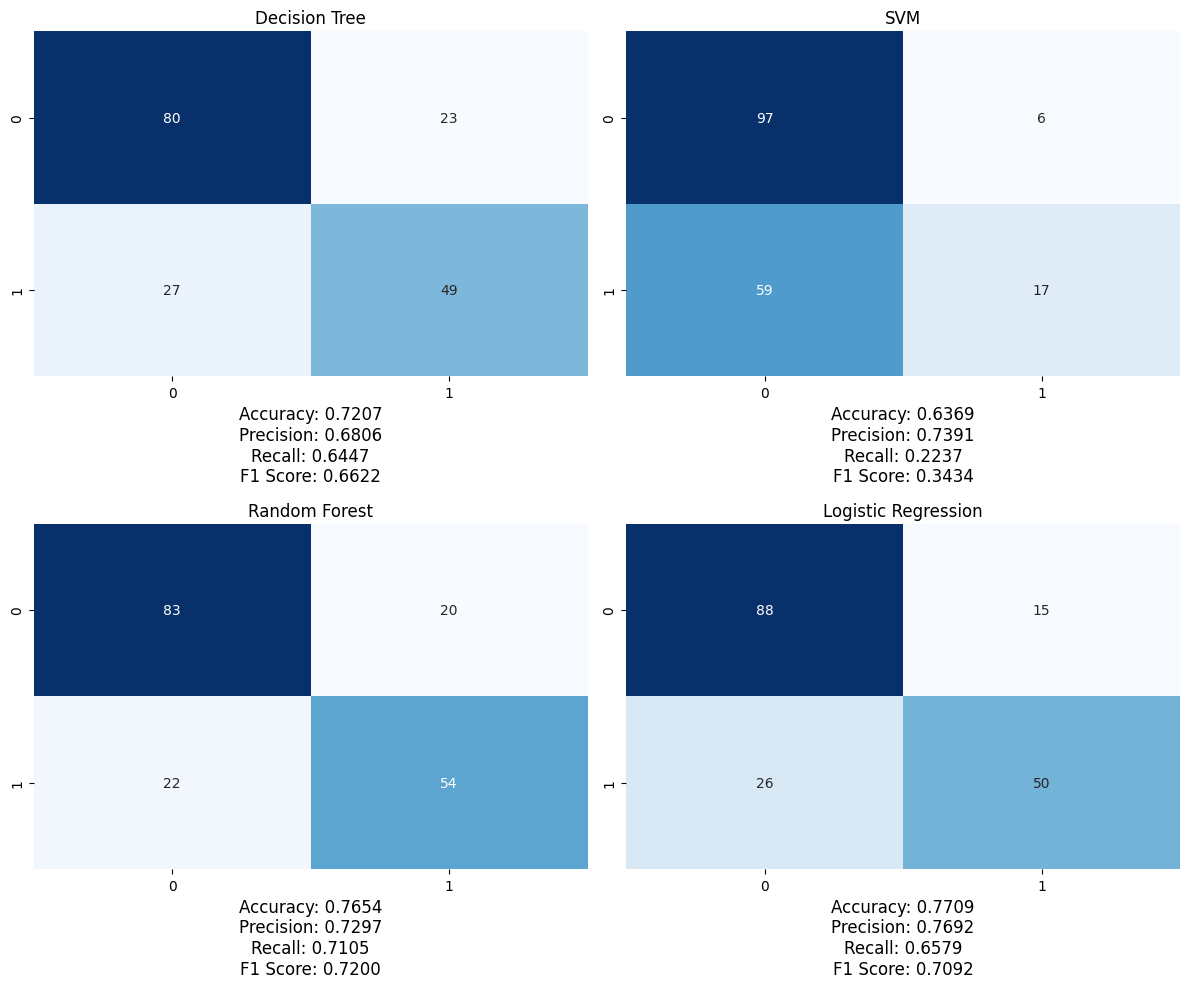

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Decision Tree 혼동행렬
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title("Decision Tree")
axes[0, 0].text(0.5, -0.2,
                f'Accuracy: {dt_accuracy:.4f}\nPrecision: {dt_precision:.4f}\nRecall: {dt_recall:.4f}\nF1 Score: {dt_f1_score:.4f}',
                  ha='center', va='center', transform=axes[0, 0].transAxes, fontsize=12, color='black')
# SVM 혼동행렬
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title("SVM")
axes[0, 1].text(0.5, -0.2,
                f'Accuracy: {svm_accuracy:.4f}\nPrecision: {svm_precision:.4f}\nRecall: {svm_recall:.4f}\nF1 Score: {svm_f1_score:.4f}',
                  ha='center', va='center', transform=axes[0, 1].transAxes, fontsize=12, color='black')
# Random Forest 혼동행렬
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title("Random Forest")
axes[1, 0].text(0.5, -0.2,
                f'Accuracy: {rf_accuracy:.4f}\nPrecision: {rf_precision:.4f}\nRecall: {rf_recall:.4f}\nF1 Score: {rf_f1_score:.4f}',
                  ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12, color='black')
# Logistic Regression 혼동행렬
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title("Logistic Regression")
axes[1, 1].text(0.5, -0.2,
                f'Accuracy: {lr_accuracy:.4f}\nPrecision: {lr_precision:.4f}\nRecall: {lr_recall:.4f}\nF1 Score: {lr_f1_score:.4f}',
                  ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=12, color='black')
# 레이아웃 조정
plt.tight_layout()
plt.show()

성능 비교 그래프 만들기
========================
> 참고: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
>> 참고2: https://seanpark11.tistory.com/m/115
>>> 참고3: https://tnqkrdmssjan.tistory.com/57

Support Vector Machine 성능 향상
===============================
> [#2] https://github.com/ripepersimmon/aiprogrammingtitanic/issues/2

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [57]:
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state= 202300698))])
param_range = [0.1, 1.0, 10.0]
param_grid = [
    {'clf__C' : param_range, 'clf__kernel': ['linear']},
    {'clf__C' : param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}
]

svm_model_grid = GridSearchCV(estimator = pipe_svc, param_grid=param_grid,
                  scoring = 'accuracy', cv = 10, n_jobs = 5)
svm_model_grid = svm_model_grid.fit(X_train, y_train)

In [58]:
svmgrid_y_pred = svm_model_grid.predict(X_val)

# 성능 평가
svmgrid_accuracy = accuracy_score(y_val, svmgrid_y_pred)
svmgrid_precision = precision_score(y_val, svmgrid_y_pred)
svmgrid_recall = recall_score(y_val, svmgrid_y_pred)
svmgrid_f1_score = f1_score(y_val, svmgrid_y_pred)
svmgrid_conf_matrix = confusion_matrix(y_val, svmgrid_y_pred)

# 혼동 행렬
print("\"Support Vector Machine\"\nConfusion Matrix:")
print(svmgrid_conf_matrix)
print(f'Accuracy: {svmgrid_accuracy:.4f}')
print(f'Precision: {svmgrid_precision:.4f}')
print(f'Recall: {svmgrid_recall:.4f}')

"Support Vector Machine"
Confusion Matrix:
[[98  5]
 [27 49]]
Accuracy: 0.8212
Precision: 0.9074
Recall: 0.6447


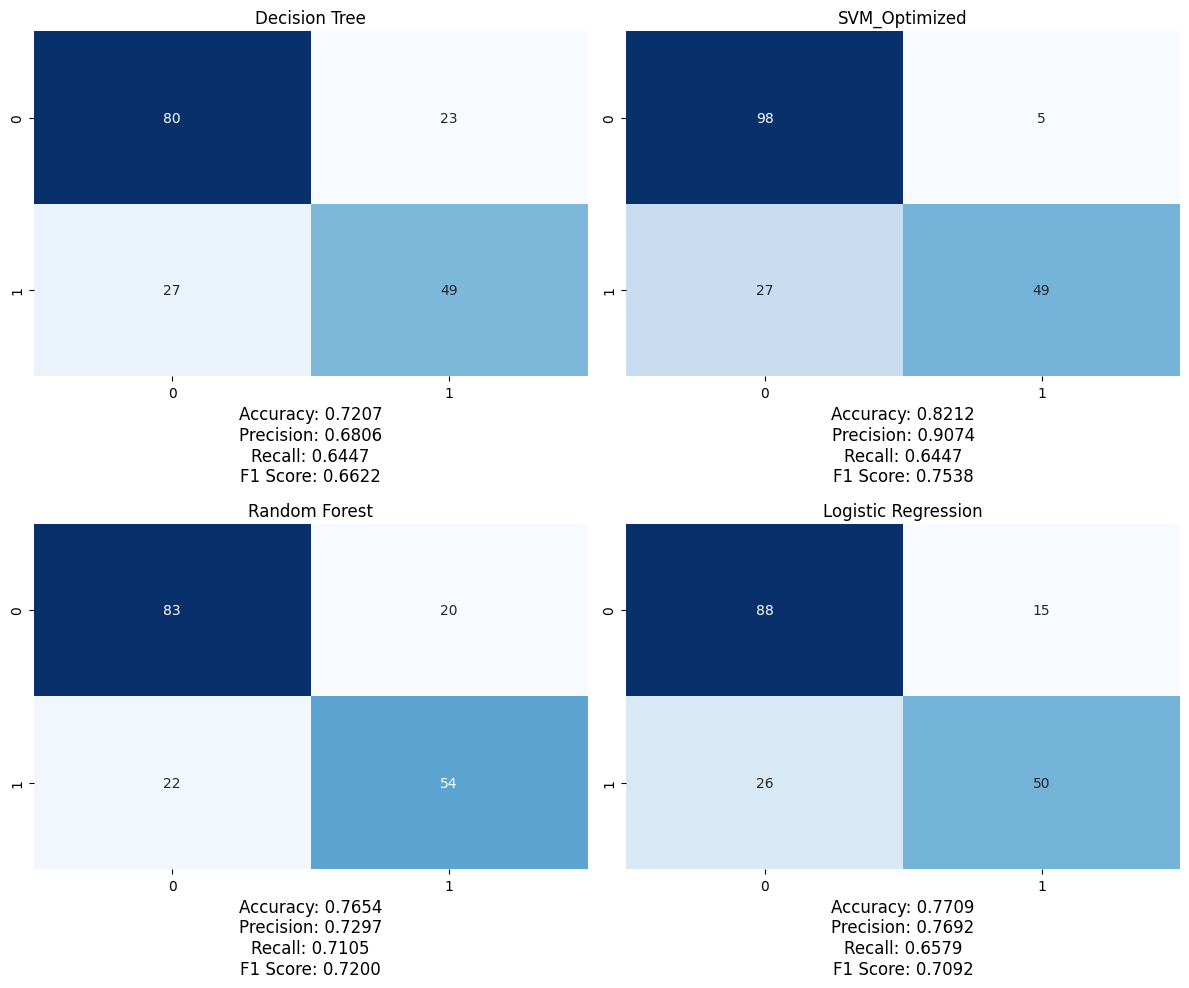

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Decision Tree 혼동행렬
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title("Decision Tree")
axes[0, 0].text(0.5, -0.2,
                f'Accuracy: {dt_accuracy:.4f}\nPrecision: {dt_precision:.4f}\nRecall: {dt_recall:.4f}\nF1 Score: {dt_f1_score:.4f}',
                  ha='center', va='center', transform=axes[0, 0].transAxes, fontsize=12, color='black')
# SVM 혼동행렬
sns.heatmap(svmgrid_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title("SVM_Optimized")
axes[0, 1].text(0.5, -0.2,
                f'Accuracy: {svmgrid_accuracy:.4f}\nPrecision: {svmgrid_precision:.4f}\nRecall: {svmgrid_recall:.4f}\nF1 Score: {svmgrid_f1_score:.4f}',
                  ha='center', va='center', transform=axes[0, 1].transAxes, fontsize=12, color='black')
# Random Forest 혼동행렬
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title("Random Forest")
axes[1, 0].text(0.5, -0.2,
                f'Accuracy: {rf_accuracy:.4f}\nPrecision: {rf_precision:.4f}\nRecall: {rf_recall:.4f}\nF1 Score: {rf_f1_score:.4f}',
                  ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12, color='black')
# Logistic Regression 혼동행렬
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title("Logistic Regression")
axes[1, 1].text(0.5, -0.2,
                f'Accuracy: {lr_accuracy:.4f}\nPrecision: {lr_precision:.4f}\nRecall: {lr_recall:.4f}\nF1 Score: {lr_f1_score:.4f}',
                  ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=12, color='black')
# 레이아웃 조정
plt.tight_layout()
plt.show()

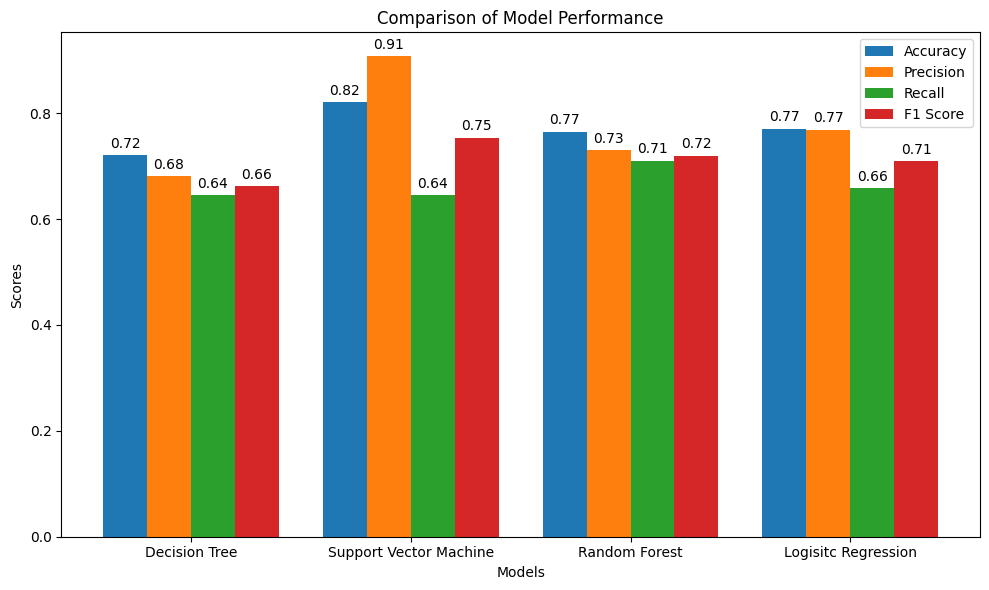

In [60]:
models = ['Decision Tree', 'Support Vector Machine', 'Random Forest', 'Logisitc Regression']
accuracy_graph = [dt_accuracy, svmgrid_accuracy, rf_accuracy, lr_accuracy]
precision_graph = [dt_precision, svmgrid_precision, rf_precision, lr_precision]
recall_graph = [dt_recall, svmgrid_recall, rf_recall, lr_recall]
f1_score_graph = [dt_f1_score, svmgrid_f1_score, rf_f1_score, lr_f1_score]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - 1.5 * width, accuracy_graph, width, label='Accuracy')
bar2 = ax.bar(x - 0.5 * width, precision_graph, width, label='Precision')
bar3 = ax.bar(x + 0.5 * width, recall_graph, width, label='Recall')
bar4 = ax.bar(x + 1.5 * width, f1_score_graph, width, label='F1 Score')

# LLM 사용해 레이블 설정 도움 받았습니다.


ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 텍스트를 막대 위로 약간 이동
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.tight_layout()
plt.show()

Support Vector Machine 개선 전/후 비교
=====================================

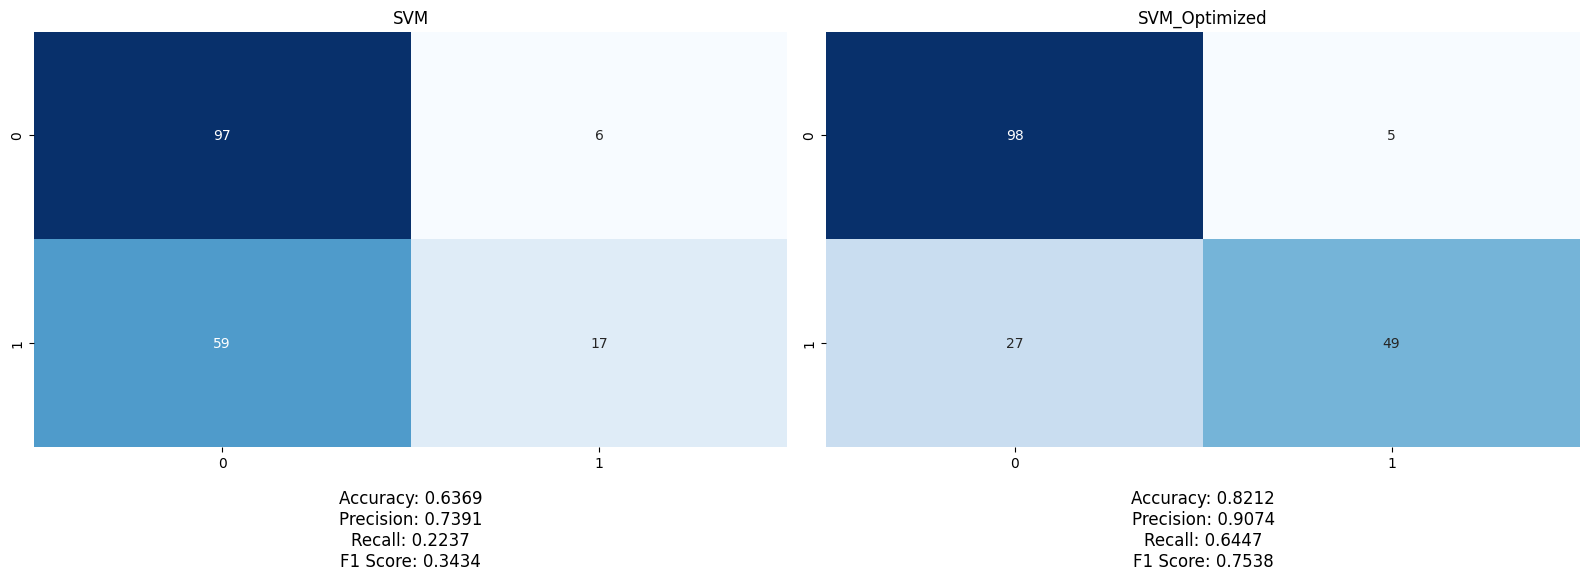

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1x2 그리드로 변경

# SVM 혼동행렬
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title("SVM")
axes[0].text(0.5, -0.2,
             f'Accuracy: {svm_accuracy:.4f}\nPrecision: {svm_precision:.4f}\nRecall: {svm_recall:.4f}\nF1 Score: {svm_f1_score:.4f}',
             ha='center', va='center', transform=axes[0].transAxes, fontsize=12, color='black')

# SVM grid search 혼동행렬
sns.heatmap(svmgrid_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title("SVM_Optimized")
axes[1].text(0.5, -0.2,
             f'Accuracy: {svmgrid_accuracy:.4f}\nPrecision: {svmgrid_precision:.4f}\nRecall: {svmgrid_recall:.4f}\nF1 Score: {svmgrid_f1_score:.4f}',
             ha='center', va='center', transform=axes[1].transAxes, fontsize=12, color='black')

# 레이아웃 조정
plt.tight_layout()
plt.show()


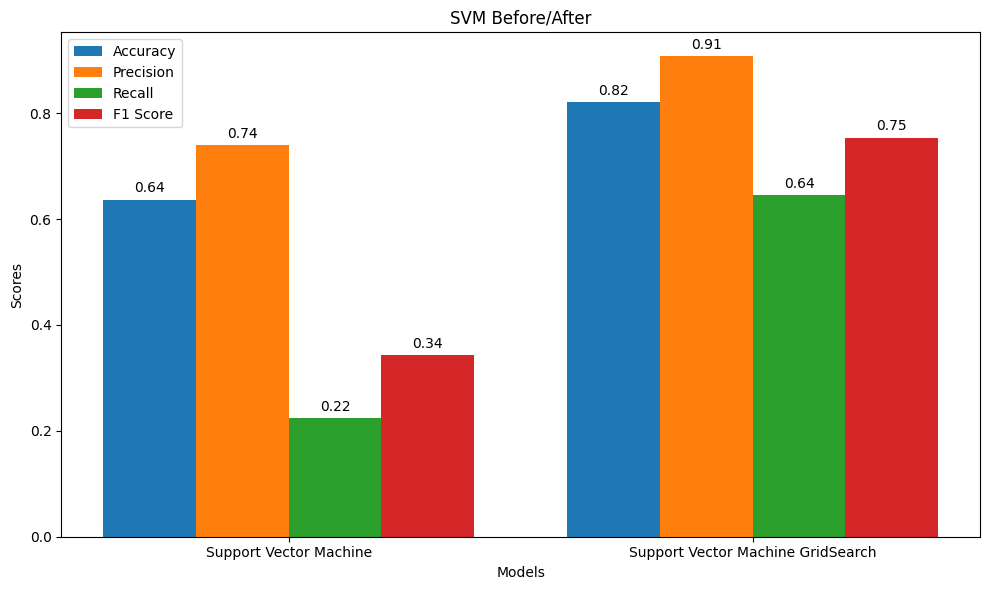

In [62]:
models = ['Support Vector Machine', 'Support Vector Machine GridSearch']
accuracy_graph = [svm_accuracy, svmgrid_accuracy]
precision_graph = [svm_precision, svmgrid_precision]
recall_graph = [svm_recall, svmgrid_recall]
f1_score_graph = [svm_f1_score, svmgrid_f1_score]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - 1.5 * width, accuracy_graph, width, label='Accuracy')
bar2 = ax.bar(x - 0.5 * width, precision_graph, width, label='Precision')
bar3 = ax.bar(x + 0.5 * width, recall_graph, width, label='Recall')
bar4 = ax.bar(x + 1.5 * width, f1_score_graph, width, label='F1 Score')

# LLM 사용해 레이블 설정 도움 받았습니다.


ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('SVM Before/After')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 텍스트를 막대 위로 약간 이동
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.tight_layout()
plt.show()